In [1]:
from Functions import*

# connect to the LCR meter
ser = DeviceConnect('COM10')

try:
    params = input('Input material i.e. P8 PVC or Mineral Oil')
    params = f'{params} Capacitance and Dissipation Factor'

    """DEF cell is 12.75 mm diameter and 1.11 mm thick"""
    area = np.pi/4*12.75**2     # float(input('Input the gel area in mm i.e. 10.2'))**2
    thickness = 1.11            # input('Input the gel thickness in mm i.e. 1')


    # ser - serial connection
    # frequencies - frequency limits between [20, 300e5] (Hz)
    # numbeerOfPoints - the number of evenly spaced frequency points
    # measurement - choose a measurement below. input the number
    #   CSQ/0  | CSD/1  | CSR/2  | CPQ/3  | CPD/4  | CPR/5 |
    #   CPG/6  | LSQ/7  | LSD/8  | LSR/9  | LPQ/10 | LPD/11|
    #   LPR/12 | LPG/13 | ZTH/14 | YTH/15 | RX/16  | GB/17 |
    # voltage - the voltage applied between electrodes either 0.5 or 1 (V)
    
    Data = Experiment(ser, frequencies = [20, 300e3], numberOfpoints = 50, measurement = 4, voltage = 1)
    DeviceDisconnect(ser)
    DataExport(params, Data, f'{area}, {thickness}, {1} - Area, thickness, voltage')

except: 
    print('Test Aborted')
    DeviceDisconnect(ser)


Frequencies: [    20     24     29     36     43     53     64     78     96    116
    142    173    210    256    312    379    462    562    684    832
   1012   1232   1499   1824   2220   2702   3287   4000   4868   5923
   7208   8770  10672  12986  15802  19228  23397  28471  34644  42155
  51296  62418  75951  92419 112457 136840 166510 202613 246544 300000]


Frequency: 20
[2.0000000e+01 3.0062355e-05 2.2687505e+00]

Frequency: 24
[2.40000e+01 4.61345e-05 3.30150e-02]

Frequency: 29
[2.90000e+01 4.60275e-05 3.60895e-02]

Frequency: 36
[3.60000e+01 4.58045e-05 4.02420e-02]

Frequency: 43
[4.30000e+01 4.56625e-05 4.40080e-02]

Frequency: 53
[5.30000e+01 4.53670e-05 4.88605e-02]

Frequency: 64
[6.40000e+01 4.51265e-05 5.37420e-02]

Frequency: 78
[7.80000e+01 4.48550e-05 5.92815e-02]

Frequency: 96
[9.60000e+01 4.45190e-05 6.54405e-02]

Frequency: 116
[1.1600e+02 4.4211e-05 7.1109e-02]

Frequency: 142
[1.42000e+02 4.38750e-05 7.75165e-02]

Frequency: 173
[1.7300e+02 4.3481e-05 8.4

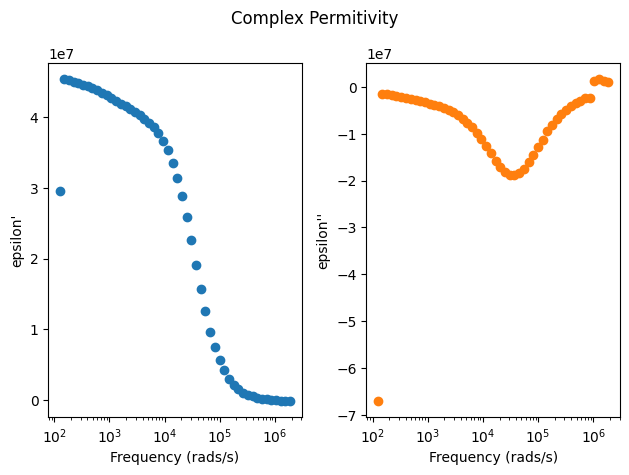

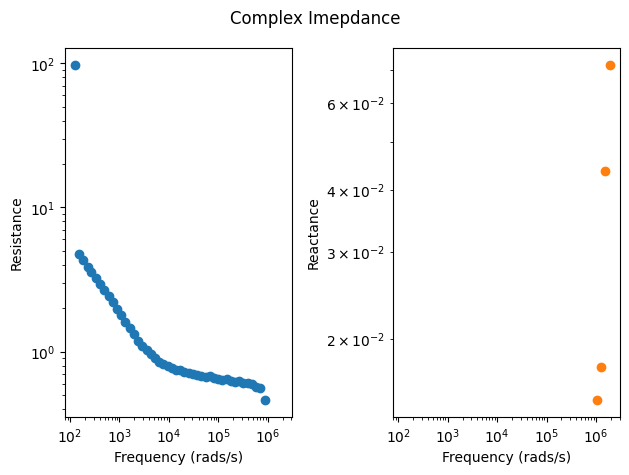

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# load the area, thickness, and voltage from the first line
params = np.loadtxt('Data/Test Capacitance and Dissipation Factor.csv', delimiter = ',', dtype = str, max_rows = 1)
area, thickness, voltage = [float(params[0]), float(params[1]), float(params[2].split('-')[0])]

# load the data and define the appropiate variables
data = np.loadtxt('Data/Test Capacitance and Dissipation Factor.csv', delimiter = ',', skiprows = 3,  dtype = float)
freq = 2*np.pi*data[:,0]
Cp = data[:,1]
D = data[:,2]

# determine complex admittance and impedance
Admittance = freq*Cp*(D + 1j)
Impedance = 1/Admittance

# determine perimittivity
C0 = area/thickness*8.85e-15 # area (mm^2), thickness (mm), vacuum permitivity (F/mm)
permitivity = Admittance/(freq*C0*1j)

fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, permitivity.real)
axs[1].scatter(freq, permitivity.imag, c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
# axs[0].set_yscale('log')
# axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('epsilon\'')
axs[1].set_ylabel('epsilon\'\'')
fig.suptitle('Complex Permitivity')
plt.tight_layout()
plt.show()  


fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, Impedance.real)
axs[1].scatter(freq, Impedance.imag, c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('Resistance')
axs[1].set_ylabel('Reactance')
fig.suptitle('Complex Imepdance')
plt.tight_layout()
plt.show()  # Display plot